In [37]:
import os
import pickle
from os.path import abspath, join, dirname
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load local libraries
# ROOT contais the project directory 
os.chdir(dirname(os.getcwd()))
os.getcwd()

'/home/ubuntu/master_thesis'

In [3]:
# Import local libraries
from src.transformations.CC_RRC_RVF_RHF_RA import get_transform as gt_train
from src.transformations.CC_R import get_transform as gt_valid
from src.plot_images import plot_images

# Read results

In [4]:
for i in os.listdir("./output/models/"):
    if i.endswith(".pkl") and i.startswith("ukbb-sex"):
        print(i)

ukbb-sex-nor-300x300_iv3-bs512-lr001-pretrained.pth_results.pkl
ukbb-sex-nor-300x300_iv3-bs256-lr001.pth_results.pkl
ukbb-sex-nor-300x300_iv3-bs256-lr0001.pth_results.pkl
ukbb-sex-nor-300x300_iv3-bs64-lr001.pth_results.pkl
ukbb-sex-nor-300x300_iv3-bs128-lr001-pretrained.pth_results.pkl
ukbb-sex-raw-300x300_iv3-bs256-lr01.pth_results.pkl


In [40]:
pth = "./output/models/"
raw_pth = "ukbb-sex-raw-300x300_iv3-bs256-lr01.pth_results.pkl"
nor_pth = "ukbb-sex-nor-300x300_iv3-bs256-lr001.pth_results.pkl"

with open(join(pth, raw_pth), "br") as pick:
    raw_res = pickle.load(pick)
with open(join(pth, nor_pth), "br") as pick:
    nor_res = pickle.load(pick)

In [42]:
raw = pd.DataFrame(raw_res)
nor = pd.DataFrame(nor_res)

In [45]:
sns.set_style("whitegrid")

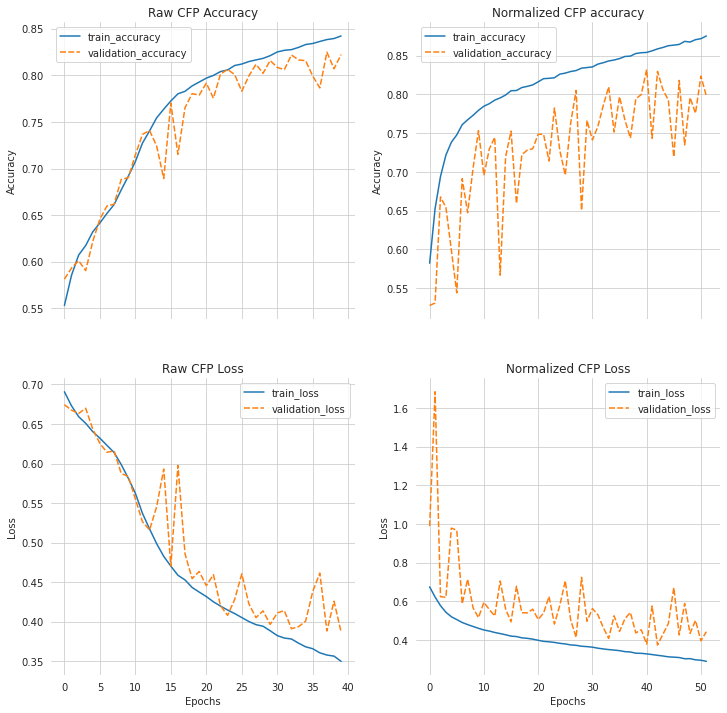

In [75]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12), sharex='col')

sns.lineplot(data=raw[["train_accuracy","validation_accuracy"]],  ax=ax[0][0])
ax[0,0].set_title("Raw CFP Accuracy")
ax[0,0].set_ylabel("Accuracy")

sns.lineplot(data=raw[["train_loss","validation_loss"]], ax=ax[1][0])
ax[1,0].set_title("Raw CFP Loss")
ax[1,0].set_xlabel("Epochs")
ax[1,0].set_ylabel("Loss")

sns.lineplot(data=nor[["train_accuracy","validation_accuracy"]],  ax=ax[0][1])
ax[0,1].set_title("Normalized CFP accuracy")
ax[0,1].set_ylabel("Accuracy")

sns.lineplot(data=nor[["train_loss","validation_loss"]], ax=ax[1][1])
ax[1,1].set_title("Normalized CFP Loss")
ax[1,1].set_xlabel("Epochs")
ax[1,1].set_ylabel("Loss")

sns.despine(left=True, bottom=True)

fig.savefig(abspath("./out/figures/best-raw-nor-accloss.png"))
fig.savefig(abspath("./out/figures/best-raw-nor-accloss.svg"))

In [40]:
results["best_acc"]

0.8218148487626031